In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [18]:
# Check if the current coloring is valid
# Check if two adjacent nodes have the same color, 
# if they do, the coloring is invalid
def is_coloring(G, col):
    for node in G.nodes:
        if col[node] in [col[neighbor] for neighbor in G.neighbors(node)]:
            return False
    return True

In [19]:
# The algorithm will try to color the graph for a certain number of steps
def color(G, k, steps):
    # Randomly assign a color to each node
    # The colors are represented by integers from 0 to k-1
    # where k is the number of colors
    col = {node: random.randint(0, k - 1) for node in G.nodes}
    # Try to color the graph for a certain number of steps
    for _ in range(steps):
        if is_coloring(G, col):
            return col, True
        # Pick a random node
        node = random.choice(list(G.nodes))
        # Get the colors of the neighbors
        # and remove them from the list of available colors
        available_colors = list(set(range(k)) - set([col[neighbor] for neighbor in G.neighbors(node)]))
        # If there are available colors, pick one at random
        if available_colors:
            col[node] = random.choice(available_colors)
    return col, is_coloring(G, col)

In [20]:
# Draw the graph with the colors
def draw_graph(G, col):
    values = [col[node] for node in G.nodes]
    # The colors are based on the values
    # The cmap parameter is used to specify the color map
    nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True)
    plt.show()

In [21]:
# Load the graph from a file
# The file should contain the edges of the graph
# Each line should start with 'e' followed by the two nodes that are connected
def load_graph(filename):
    G = nx.Graph()
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('e'):
                _, node1, node2 = line.split()
                # Add the edge to the graph
                # The nodes are converted to integers
                G.add_edge(int(node1), int(node2))
    return G

Found a valid coloring.


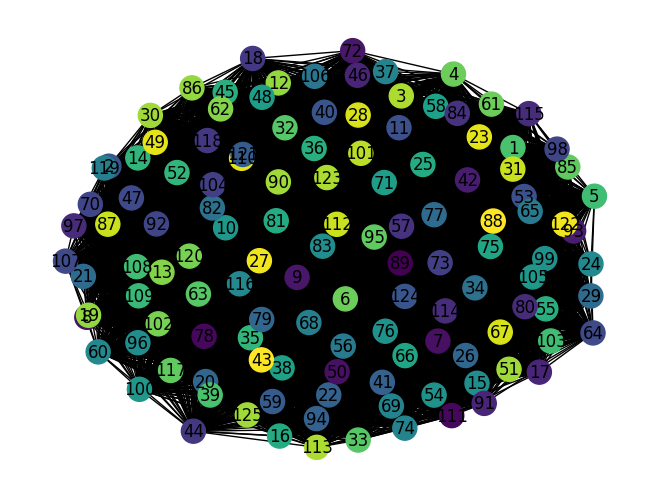

In [24]:
G = load_graph('dsjc125.txt')
col, solved = color(G, k=50, steps=4000)

if solved:
    print("Found a valid coloring.")
    draw_graph(G, col)
else:
    print("Did not find a valid coloring!")